   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.80     17.26     75.26   431.9  0.09087    0.06232    0.02853   
1        19.81     22.15    130.00  1260.0  0.09831    0.10270    0.14790   

   Prescience  Reactivity  Midi-chlorien  ...  Evade  Stims  Sprint   Combo  \
0     0.01638      0.1847        0.06019  ...  24.49   86.0   562.0  0.1244   
1     0.09498      0.1582        0.05395  ...  30.88  186.8  2398.0  0.1512   

    Delay  Attunement  Empowered   Burst  Grasping  knight  
0  0.1726      0.1449    0.05356  0.2779   0.08121    Sith  
1  0.3150      0.5372    0.23880  0.2768   0.07615    Jedi  

[2 rows x 31 columns]
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0    -0.671345 -0.446445 -0.700809 -0.646266 -0.407567  -0.811338  -0.769211   
1     1.669067  0.730420  1.622437  1.796448  0.139273  -0.019904   0.741297   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0   

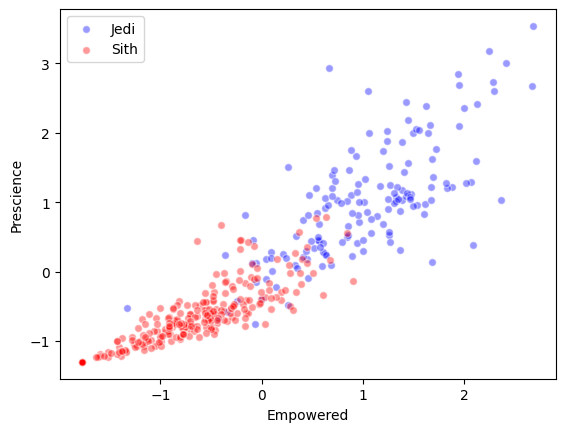

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../resources/Train_knight.csv')
# data = pd.read_csv('../resources/Test_knight.csv')

print(data.head(2))
for col in data.columns:
    if not pd.api.types.is_string_dtype(data[col]):
        data[col] = (
            data[col]
            .subtract(data[col].mean())
            .divide(data[col].std())
        )
print(data.head(2))

if 'knight' in data:
    grouped = data.groupby("knight")
    jedi_data = grouped.get_group("Jedi")
    sith_data = grouped.get_group("Sith")
    js, jp = jedi_data["Empowered"], jedi_data["Prescience"]
    ss, sp = sith_data["Empowered"], sith_data["Prescience"]
    plt.scatter(js, jp, color="blue", s=30, alpha=0.4, edgecolors="white")
    plt.scatter(ss, sp, color="red", s=30, alpha=0.4, edgecolors="white")
    plt.xlabel("Empowered")
    plt.ylabel("Prescience")
    plt.legend(labels=("Jedi", "Sith"))
else:
    plt.scatter(data['Empowered'], data['Prescience'], color="green", s=30, alpha=0.4, edgecolors="white")
    plt.xlabel("Empowered")
    plt.ylabel("Prescience")
    plt.legend(['Knight'])
plt.show()